In [1]:
import GDconfig
import numpy as np
import pandas as pd
from GSpreadConnection.main import GSpreadConnection
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Connect GSpread and Open spread file
GSC = GSpreadConnection(GDconfig.jsonfile).connect()
GSC = GSC.open_sheet('DailyLifeLog').load_titles()

['シート1', '水道使用', 'Statistics']


In [3]:
df = GSC.read_as_pandas('水道使用').df
df.head(3)

,年.自月～年.至月,日数(日),使用水量(m3),CO2排出量(kg),水道料金(円),下水道料金(円),合計金額(円),領収金額(円),notional(JPY)/day,water(m3)/day,CO2(g)/day
1,H26.03～H26.04,57,12,2.4,2503,1176,3679,3574,62.70,0.25,49.26
2,H26.05～H26.06,62,16,3.2,2633,1192,3825,3718,59.97,0.24,47.12
3,H26.07～H26.08,62,20,4.0,2764,1684,4448,4340,70.00,0.27,55.00


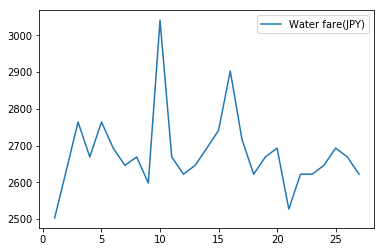

In [4]:
df.iloc[:,4].plot(label='Water fare(JPY)')
plt.legend()

In [5]:
df = pd.DataFrame(np.random.randn(3,2))
df

,0,1
0,0.010176,-0.176545
1,0.199675,0.462414
2,-0.259492,-0.804045


In [6]:
# Create new sheet and upload dataframe to new sheet
GSC = GSC.create_sheet("test_sheet",GDconfig.gmail)
GSC = GSC.upload_from_pandas('Sheet1',df,'B2')